# Lesson 1: Digital Images

Our goal today is to understand what a digital image is and how it is commonly represented as bits and bytes. We will cover the following topics:

- EPISODE 1: Load and View Data
    - Navigate jupyter note books (5 mins)
    - Load data file (10 mins)
    - Load and use metadata (10 mins)
    - View images (15 mins)
   


- EPISODE 2: Study Image
    - Histogram the pixel values in the image (10 mins)
    - Indexing and arrays (10 mins)
    - Errors and debugs (15 mins)

## 1.Navigate Jupyter note books


### Notes about jupyter notebooks:
There are two modes of the notebook cells: Edit mode and Command mode:  
   
From Edit mode (green-selected cell that you can type into)
   - Press ESC/click outside of the edit box: enters Command mode
   - Can be a code or a markdown cell

From Command mode (blue-marked cell)
   - "a" enters a new cell above the selected cell
   - "b" enters a new cell below the selected cell
   - "dd" deletes the selected cell
   - "y" changes the cell type to python code
   - "m" changes the cell to markdown
   - Doulbe cliking on a markdown makes it into Command mode
   - "h" pulls up a help window
   - Press ENTER/click inside of the edit box: enters edit mode
   - SHIFT-ENTER runs the cell as code or markdown and selects the cell below 

### Exercise: Practice using & navigating jupyter notebooks

- Double click on this cell.
- Change this cell between Edit mode and Command mode.
- Add a new cell above and below this cell, then delete them.
- Change this cell to python code and run.
- Change this cell to markdown and run.

## 2. Load data file


# Load libraries

### First, some code to make it easier to access useful libraries & to visualize data in the notebook.

<font color ='red'> What does a library provide? <font>

In [1]:
%matplotlib inline                

import numpy as np               #makes numpy library available as 'np'
import matplotlib.pyplot as plt  #makes matplotlib.pyplot available as 'plt' 
import seaborn as sns            #makes seaborn library avialable as 'sns'


"%matplotlib inline" is a magic function to sets the backend of matplotlib to the 'inline' backend, which means plotting right after command, and saving the results.

Note, importing `seaborn` makes `Matplotlib` look nicer.

### Build a common data path

Let's set some defaults for the packages we just imported, which gets rid of grid line on our image plots!

Use bash commands to:

1. Make a directory called ~/XYZ/Images-BIOS254,  where XYZ is the folder you are using for course files
2. Download _bioimages_code.zip_ and _bioimages_data.zip_ from Canvas and move the resulting folders into this one
3. Move into this folder
2. Navigate to data folder, we will be loading  
HAC-Cit-KRAB+dox_w1DIC_s41_t251 + 
HAC-Cit-KRAB+dox_w2YFPled_s41_t251 + 
HAC-Cit-KRAB+dox_w3RFPled_s41_t251


To avoid switching back & forth, we can run bash commands from this notebook. 

**Exercise**

Once you have files downloaded, run bash commands to navigate to your Images-BIOS254 directory and to see its contents.

In [2]:
cd ~/Documents/DataLucenceCourse/Images-BIOS254

/Users/ws/Documents/DataLucenceCourse/Images-BIOS254


In [3]:
pwd

'/Users/ws/Documents/DataLucenceCourse/Images-BIOS254'

In [4]:
ls

Code/      Data/      LICENSE    README.md


In [5]:
ls Data

Data_ConfocalDrugPanel/         Tracking/
Figures/                        brightfield_image.TIF
L1Data/                         example_Simple Segmentation.h5
Settings-2013-08-01.rtf


In [6]:
ls Data/L1Data

HAC-Cit-KRABdox_s41.json               HAC-Cit-KRABdox_w2YFPled_s41_t251.TIF*
HAC-Cit-KRABdox_w1DIC_s41_t251.TIF*    HAC-Cit-KRABdox_w3RFPled_s41_t251.TIF*


## Exercise: Let's discuss limitations with how this data is names?  
- FILENAMING CONVENTIONS
- INCREMENTAL DATA NAMES TO LINK TO META DATA
- NO SPACES IN FILE NAME
- JOIN IMAGES INTO ONE 3 CHANNEL TIFF
- LENGTH OF NAME
- TYPES OF CHARACHTERS IN NAME (OS ISSUES)
- PUT KEY INFO ABOUT DATA IN METADATA (ie exp conditions, channel names, etc.)

The images in this folder are kindly donated by Dr. Bintu (Bioengineering) and were used in "Dynamic of Epigenetic Regulation at the Single-Cell Level" (Bintu et al. 2016)

Let's make a common data path for our class.

In [7]:
data_path = "./Data/L1Data/"

### Load image file into Jupyter notebook


In [8]:
from skimage.io import imread #get image read function from scikit image aka skimage

In [9]:
brt_data = imread(data_path + "HAC-Cit-KRABdox_w1DIC_s41_" + "t251.TIF")
ch1_data = imread(data_path + "HAC-Cit-KRABdox_w3RFPled_s41_" + "t251.TIF")


In [10]:
brt_data.shape #want to know the dimensions of an image? use "shape" function from the numpy library

(512, 512)

In [11]:
ch1_data.shape

(512, 512)

## Exercise (3 min):  read in the third channel, check shape and size
    What information does 'size' provide?
    What else can you learn about a NP array? 
    Check out this website for ideas — https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#array-attributes

In [12]:
ch2_data = imread(data_path + "HAC-Cit-KRABdox_w2YFPled_s41_" + "t251.TIF")
print(ch2_data.shape)
print(ch2_data.size)

(512, 512)
262144


We have three images of a single microscope field that naturally belong together. 
So, lets combine all the channels into one variable/data-structure

In [13]:
imdata = np.array([brt_data, ch1_data, ch2_data])

In [14]:
imdata.shape

(3, 512, 512)

## 3. Metadata


`data` is a `numpy` array. it's shape indicates that it has **four** dimensions.  So, this file is more complex than a single two-dimensional data array.  

Unfortunately, the researchers here only put relevant info on data in the name of each image, not in the metadata - i've created a fake metadata for you; happy to show you how to create after class if there is time.

### Load the metadata

File format called JSON. JSON files are easily loaded into python as the dictionary data type. Dictionaries in python are indexed with keys, which are strings instead of numerical indices (such as used in lists). 

To gain some intuition for this concept, load the JSON file and examine it.

Tips to learn more: This website https://docs.python.org/3/tutorial/datastructures.html#dictionaries provides more formal descriptions of dictionaries.  There are also decent tutorials on YouTube for beginners, e.g. https://www.youtube.com/watch?v=daefaLgNkw0. 

In [15]:
import json
with open(data_path + "HAC-Cit-KRABdox_s41.json", mode='r') as metadata_ctl:
    meta_data = json.load(metadata_ctl)

In [16]:
print(meta_data)

{'axes': ['CXY'], 'channels': ['DIC', 'YFP', 'RFP'], 'pixel_size': ['1', '1'], 'date': ['01/01/2019'], 'image_preprocessing': ['none'], 'condition': ['HAC-Cit-KRAB+dox']}


This is a bit difficult to digest, so let's work our way through the information

In [17]:
#list the keys in the dictionary
for key in meta_data:
    print(key)

axes
channels
pixel_size
date
image_preprocessing
condition


In [18]:
for key, value in meta_data.items():
    print(key, value)

axes ['CXY']
channels ['DIC', 'YFP', 'RFP']
pixel_size ['1', '1']
date ['01/01/2019']
image_preprocessing ['none']
condition ['HAC-Cit-KRAB+dox']


In [19]:
meta_data["channels"]

['DIC', 'YFP', 'RFP']

### Exercise: Print only the pixel size info, and in a seperate cell, the axes info

In [20]:
meta_data["pixel_size"]

['1', '1']

In [21]:
meta_data["axes"]

['CXY']

### Exercise: Based on the metadata and the shape, what is a likely meaning of the four axes of ctl_data?
<font color = 'red'> give students the shape below <font>

In [22]:
imdata.shape

(3, 512, 512)

### Use the metadata 

It can be useful to organize your data into a dict instead of a numerical array when one of the dimensions of the array corresponds to something that is non-numerical in nature. Here, the channel dimension is stored as another dimension in the numerical array that is wt_data. To get the image corresponding to one of the channels, you would have to remember which of the channel slices corresponds to the channel you would like to see. Below we'll organize the data into a dict so that the channels can be indexed by an intuitive string and not a numerical index.

create a new dictionary that refers to one slice and all channeles

In [23]:
slice = {}

for idx, channel in enumerate(meta_data['channels']):
    slice[channel] = imdata[idx,:,:]
    print(idx)

0
1
2


In [24]:
slice['YFP']

array([[345, 344, 337, ..., 346, 338, 344],
       [340, 343, 346, ..., 340, 338, 345],
       [344, 352, 351, ..., 354, 340, 344],
       ...,
       [341, 340, 328, ..., 341, 344, 338],
       [335, 336, 336, ..., 343, 341, 347],
       [332, 335, 335, ..., 341, 339, 342]], dtype=uint16)

### Exercise (3 min): Look at another channel; can you figure out what the numbers mean?

## 4. View image in iPython notebook


Use seaborn package to suppress grid lines.
About Seaborn: https://www.datacamp.com/community/tutorials/seaborn-python-tutorial#sm

In [25]:
sns.set_style("dark") 

get the dimensions of this single slice in pixels

In [26]:
brt_data.shape #name that we assigned to the brightfield image above

(512, 512)

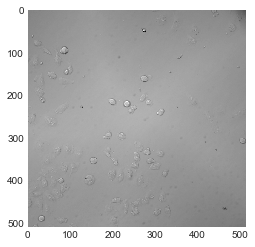

In [27]:
plt.imshow(brt_data, cmap='gray') #show the image in the notebook, using a grayscale lookup table

### Exercise: Use plt.imshow to show the same image, but use the dict we defined above to get the desired channel

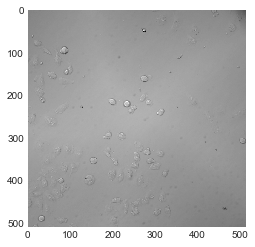

In [28]:
# We can also look at the slice dict
plt.imshow(slice['DIC'], cmap='gray')

## 5. Color maps and color science


We had to specify how we wanted our colorless image to be rendered on our colorful screen, which is why we included `cmap=gray` (cmap for colormap).

If we wanted to visualize things in a more striking way, with false colors and more contrast, we could use a different colormap.

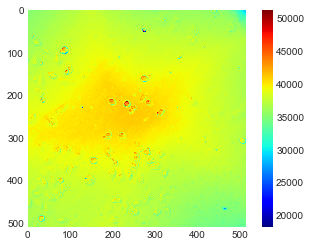

In [29]:
plt.imshow(brt_data, cmap='jet')
plt.colorbar()

### Exercise: Find your favorite color map
Which color map is better? Jet or plasma? Read the documentation for the matplotlib colormaps online and find your favorate color map. 
Here is the link: https://matplotlib.org/users/colormaps.html

Any of the rainbow colormaps are bad colormaps because they are perceptually non-uniform.

## 6. Histogram the pixel values in the image


What is the bit depth of our images?


In [30]:
brt_data.dtype  #this is our brightfield image

dtype('uint16')

### Exercise (3 min): What is the difference between 1 bit vs. 8 bit vs. 16 bit display (thumbnail view do not show image if > 16 bit); what do you think 1 bit will look like?

There are many kinds of data types. Here the data type is `uint16`.
 `uint16` means "unsigned (not negative) integer with 16 bits per pixel".

16 bits means there are $2^{16} = 65536$ possible values, which are numbers that range from 0 to 65535 in python.

The bit depth of your image depends on the detector (camera, other detector) that your microscope uses.
Many detectors divide intensity scale into 8 bits (or $2^8 = 256$ levels, 0 to 255) or 16 bits ($2^{16} = 65536$ or 0 to 65536). 

_note: your operating system cannot display thumbnail images of 16-bit images_

### Make histogram of the pixel values


Pixels in an image are just represented by numbers. We can get a sense for the distribution of brightness in our image by looking at a histogram of intensities. Here we don't think about an image as representing something spacial - just a collection of numbers.

Since the histogram is agnostic about _where_ in the image each pixel is located,
We can build a histogram by pushing our array into a 1D array of data

In [31]:
flat_data = brt_data.flatten()

In [43]:
?sns.distplot

distplot=distribution plot

/Users/ws/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 60000)

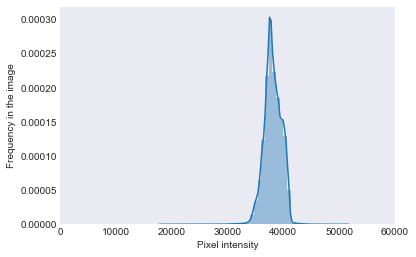

In [45]:
#sns.distplot(flat_data, norm_hist=True) #this function will be depreacated in seaborn (infor from Dec3,2023)

sns.distplot(flat_data, hist=True) #sns.distplot automatically guess good number of bins.
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency in the image")
plt.xlim(0,60000)

### Exercise: Why does the histogram of the YFP channel look the way it does?
Try to fix the display _hint remove the plt.xlim statement_

/Users/ws/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 60000)

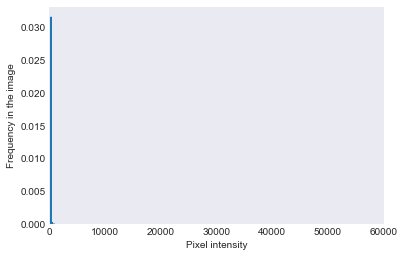

In [48]:
flat_data = ch1_data.flatten()
sns.distplot(flat_data, hist=True) #sns.distplot automatically guess good number of bins.
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency in the image")
plt.xlim(0,60000)

## 7. Indexing and arrays


### Print a subset of pixel values 

How would we index into the upper left-most pixel?

In [49]:
slice["YFP"][1,1]

343

What about the lower left?

In [50]:
slice["YFP"][-1,0]

332

row -1 is the last row; column 0

What about a 10x10 slice from the upper right?

In [51]:
slice["YFP"][0:10,-10:-1]

array([[344, 354, 350, 346, 347, 342, 342, 346, 338],
       [344, 345, 345, 351, 347, 339, 338, 340, 338],
       [340, 348, 347, 342, 344, 341, 351, 354, 340],
       [343, 346, 341, 353, 350, 340, 340, 339, 338],
       [341, 342, 342, 347, 347, 345, 346, 344, 340],
       [349, 344, 349, 345, 347, 343, 350, 348, 348],
       [342, 345, 352, 349, 343, 349, 344, 348, 342],
       [341, 346, 350, 344, 347, 347, 346, 334, 339],
       [348, 353, 348, 350, 338, 347, 343, 344, 344],
       [354, 353, 352, 350, 354, 348, 341, 342, 340]], dtype=uint16)

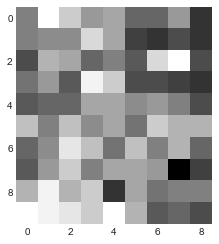

In [52]:
plt.imshow(slice["YFP"][0:10,-10:-1], cmap='gray')

row 0:10 is 0 to 9; 10 not counted and not included;
column -10:-1 is last - 10 to the second to last - does not include the last one.

INDEXING: We only have 90 pixels not 100 pixels. Ranges of indices are exclusive on the high side, inclusive on the low. 

What happens if I have a slice `1:2`?

In [53]:
slice["YFP"][1:2, 1:2]

array([[343]], dtype=uint16)

We get row and column "from 1, up to (but not including) 2". This is the same as `data[1,1]`.

To save some typing when slicing into your data, we can leave off the value before the colon, meaning (to the beginning). Leaving off the value after means (to the end).

In [54]:
slice["YFP"][:10,-10:]

array([[344, 354, 350, 346, 347, 342, 342, 346, 338, 344],
       [344, 345, 345, 351, 347, 339, 338, 340, 338, 345],
       [340, 348, 347, 342, 344, 341, 351, 354, 340, 344],
       [343, 346, 341, 353, 350, 340, 340, 339, 338, 349],
       [341, 342, 342, 347, 347, 345, 346, 344, 340, 351],
       [349, 344, 349, 345, 347, 343, 350, 348, 348, 346],
       [342, 345, 352, 349, 343, 349, 344, 348, 342, 347],
       [341, 346, 350, 344, 347, 347, 346, 334, 339, 352],
       [348, 353, 348, 350, 338, 347, 343, 344, 344, 344],
       [354, 353, 352, 350, 354, 348, 341, 342, 340, 342]], dtype=uint16)

###  Exercise (3 min): Set that subset of values to 0?

Let's not ruin our original by making a copy! (Keep RAW DATA RAW)

In [56]:
modified_data = slice["YFP"].copy() #keep raw data raw

We've viewed data using slicing, now let's set data using slicing!

In [57]:
modified_data[:200,-200:] = 0

Even though `modified_data[:200,:200]` is a 200x200 array, and 0 is just a scalar, `numpy` is smart and will _broadcast_ the 1x1 value `0` so that the whole 500x500 array is set to a 200x200 array of zeros.

View the modified image

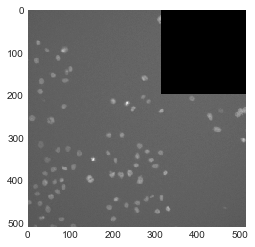

In [58]:
plt.imshow(modified_data, cmap='gray')

## 8. Errors and debugs 


Let's make an random function

In [43]:
%matplotlib inline                

import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

def load_image(filename):
    return np.random.rand(400, 600)

### Syntax errors

What is this code supposed to do?

In [44]:
for i in range(50)
    image_data = load_image("image_{}".format(i))
    my_images.append(image_data)

SyntaxError: invalid syntax (<ipython-input-44-0fd0184bb011>, line 1)

This file is trying to load a series of numbered images into an array of images.

_However_ running it gives you an error

Python errors are given to you as a "stack trace". Let's first dissect a stack trace.

**`File "<ipython-input-some_number-some_ID_number>", line 3`** tells you what file, and where in the file, the error came from. Because we're in a notebook, instead of a file we get a message that tells us we're in a notebook using IPython and that the error was in line 3.

**`  for i in range(50)`** is where Python conveniently reminds us what code was at line 3. Sometimes it shows us a bit of code before and after to give us context.

**`^`** marks exactly _where_ in line 3 the problem was noticed. This can be tricky because a problem with a function call may not be noticed until the closing ')' at the very end of the function. Nonetheless, here it might be helpful.

**`SyntaxError: invalid syntax`**. This tells us that our problem is a SyntaxError, which is one of a large hierarchy of errors python can provide us with.

`SyntaxError`s happen when Python sees you violating the rules of the language - it's a problem with the literal code characters you have typed rather than what your code is trying to do conceptually. Therefore they are usually short errors with quick fixes.

Do you see how to fix _this_ error?

In [ ]:
for i in range(50):# do something here to fix
    image_data = load_image("image_{}".format(i))
    my_images.append(image_data)

### NameError 

`NameError`s happen when you try to access a python variable or function that does not exist yet. To get a NameError, Python has to actually try to run your code, so NameError is a type of `RuntimeError`.

Can you add in a line that fixes this code?

In [ ]:
my_images = [] #add a line here to fix

for i in range(50):
    image_data = load_image("image_{}".format(i))
    my_images.append(image_data)

In [ ]:
for i in range(50):
    intensity = my_images[i].mean()
    next_intensity = my_images[i+1].mean()
    if abs(intensity - next_intensity) > 0.10 * intensity:
        print("Notice: intensity jumped between images {} and {}".format(i, i+1))
        break

### IndexError

`IndexError`s happen when you try to access data from a list-like object, such as a `numpy` array or image, but the location you requested does not exist. Like asking for index 10 for a list of 10 items.

In image processing, this is often caused by switching your rows/columns or width/height. Say you have a 400x600 image and try to access a pixel at row 401-600.

It is also generally common when looping through something by index. This is a good reason to use Python's `for item in collection` syntax rather than looping through indices!

In [ ]:
data = [1, 3, "cat", 0.4]

print('list 1')
# This is less clear and prone to error
for index in range(4):
    item = data[index]
    print(item)

print('\nlist 2')    
# Than this
for item in data:
    print(item)

One interesting thing about Python loop's current value, `i` in this case, is available outside the loop and does not reset until you run the loop again. This let's us quickly check what value `i` took on when the code crashed!

In [ ]:
print(i)

Now can you explain what happened here? Can you fix this code?

In [ ]:
for i in range(49):
    intensity = my_images[i].mean()
    next_intensity = my_images[i+1].mean()
    if abs(intensity - next_intensity) > 0.10 * intensity:
        print("Notice: intensity jumped between images {} and {}".format(i, i+1))
        break

### Exercise: Think and discuss about the sufficiency and necessity of error messages.

What would have happened if instead of comparing image `i` to image `i+1` we had compared image `i-1` (previous image) to `i`?

In [ ]:
for i in range(50):
    intensity = my_images[i-1].mean()
    next_intensity = my_images[i].mean()
    if abs(intensity - next_intensity) > 0.10 * intensity:
        print("Notice: intensity jumped between images {} and {}".format(i-1, i))
        break

There was no error! Did this solve our problem?

No, it did not. Consider the first pass through the loop. `i` is 0. `i-1` is -1. What is `my_images[-1]`?

`my_images[-1]` doesn't give a name error, -1 refers to the _last_ item in the list. But we don't want to compare the first and last images, so although this runs it's not the right behavior.

### Long stack traces

What can make the errors that we see in this course particularly daunting is that we use many libraries which use other libraries which in turn use more libraries, etc. This means that the peice of code that reports the error is often code we didn't write or didn't even know was being run, which can make errors feel unfair or unsolveable. But here's what's really happening.

Imagine that you send me on an errand to buy groceries. You give me detailed instructions (a program) describing the steps to take. So I get in the car and start driving to the store. Half way there, I notice I'm out of gas. That's OK, I have my own program for dealing with that. "Buy gas at a station" is a bit of instructions you didn't know I had, nor did you anticipate me using, but it's being used now anyway. I pull into the gas station, get out of my car, pay for the gas, and try to start filling up. However, the gas cover locks from the inside. I don't know about this (new car), and send you a text trying to precisely describe the error: "Nozzle cannot pass through solid metal".

So here you are, having sent me to buy groceries, and I tell you I can't because "nozzle cannot pass through solid metal". Python is frustrating in the same way: generally it tells you the _lowest-level problem_ when it fails. It's important to keep this in mind: the piece of code that reports an error is probably not the one that caused it!

Stack traces report errors with the first call at the top. **This means that you should read a long stack trace by starting at the bottom and working up until you see a line of code that you wrote or a function you called.** This line is likely to be the line you have to change. Maybe you passed a string to a function when it needed an integer.

Lines below code you wrote in the stack trace may contain hints about what's wrong. Maybe the lowest error at the bottom of the stack trace is "Cannot subtract string from int", which is a cluse that there was a string where an int should be.

Higher lines tell you the context that the error happened in, i.e. what code ran before the error. Maybe you have a function that you use several times - you want to know _which_ usage of the function is giving you the error. If it's the 2nd time you use the function, then either the function _can_ work, but not in a particular context, or the function is being called in the 2nd location _before_ the first: the flow of your program is not what you expected.